In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('heatmap.csv', index_col=0)
df.rename(columns={'n_layers' : 'Total Layers', 'n_neurons' : 'Total Neurons' }, inplace=True)

In [4]:
hm = df.pivot(index='Total Neurons', 
              columns='Total Layers', 
              values='energy')
hm2 = df.pivot(index='Total Neurons', 
              columns='Total Layers', 
               values='loss')
hm3 = df.pivot(index='Total Neurons', 
              columns='Total Layers', 
               values='mean_control')
hm4 = df.pivot(index='Total Neurons', 
              columns='Total Layers', 
               values='mean_variance')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib import rcParams
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib import rcParams
# Smallest context:

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 8,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    #'savedpi': 150,
    'text.usetex': True, 
    'legend.title_fontsize': 4,
    'text.latex.preamble': [r"\usepackage{bm}", r"\usepackage{mathtools}"]}
# tell matplotlib about your params

fig_width = 7#*ratio  # height in inches

fig_height = 10#*ratio  # height in inches
fig_size = [fig_width,0.5*fig_height]
rcParams.update({'figure.figsize': fig_size})
rcParams.update(params)

/home/lucasb/anaconda3/envs/inventory/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


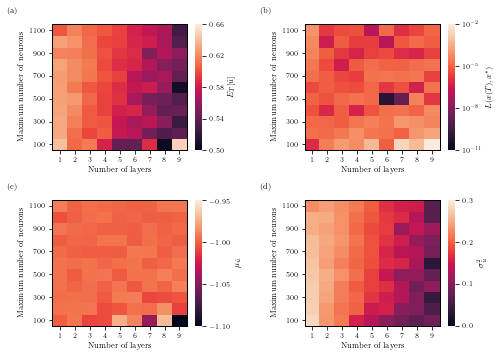

In [9]:

#!pip install seaborn
#sns.set_style("ticks")
#sns.set_context("paper")
#sns.set(font="Latin Modern Roman")

#sns.set(font_scale=0.8)
def prep_g(g, label, label_x=-3, label_y=12):
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
    g.invert_yaxis()
    lb = g.text(label_x, label_y,r""+label)
    lb.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))


    # Drawing the frame
    for _, spine in g.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)
        spine.set_color('black')
    g.tick_params(left=True, bottom=True) ## other options are right and top
    
fig, ax =plt.subplots(2,2)
fig.patch.set_facecolor('white')
plt.subplots_adjust(
                    wspace=0.2, 
                    hspace=0.2)

g = sns.heatmap(hm/2, ax=ax[0, 0], cbar_kws={'label': r"$E_T[\hat{u}]$",'ticks':[0.5,0.54,0.58,0.62,0.66]}, vmin=0.5, vmax=0.66)
prep_g(g, '(a)')
ax[0,0].set_yticks([0.5,2.5,4.5,6.5,8.5,10.5])
ax[0,0].set_yticklabels([100,300,500,700,900,1100])
ax[0,0].set_xlabel(r'Number of layers')
ax[0,0].set_ylabel(r'Maximum number of neurons')

g =sns.heatmap(hm2, ax=ax[0, 1], cbar_kws={'label': r"$L(x(T),x^*)$",'ticks':[1e-11,1e-8,1e-5,1e-2]}, vmin=1e-11, vmax=1e-2, norm=mpl.colors.LogNorm(vmin=1e-11, vmax=1e-2))
prep_g(g, '(b)')
ax[0,1].set_yticks([0.5,2.5,4.5,6.5,8.5,10.5])
ax[0,1].set_yticklabels([100,300,500,700,900,1100])
ax[0,1].set_xlabel(r'Number of layers')
ax[0,1].set_ylabel(r'Maximum number of neurons')

g = sns.heatmap(hm3, ax=ax[1, 0], cbar_kws={'label': r"$\mu_{\hat{u}}$",'ticks':[-1.1,-1.05,-1,-0.95]}, vmin=-1.1, vmax=-0.95)
prep_g(g, '(c)')
ax[1,0].set_yticks([0.5,2.5,4.5,6.5,8.5,10.5])
ax[1,0].set_yticklabels([100,300,500,700,900,1100])
ax[1,0].set_xlabel(r'Number of layers')
ax[1,0].set_ylabel(r'Maximum number of neurons')

g = sns.heatmap(hm4, ax=ax[1, 1], cbar_kws={'label': r"$\sigma^2_{\hat{u}}$",'ticks':[0,0.1,0.2,0.3]}, vmin=0, vmax=0.3)
prep_g(g, '(d)')
ax[1,1].set_yticks([0.5,2.5,4.5,6.5,8.5,10.5])
ax[1,1].set_yticklabels([100,300,500,700,900,1100])
ax[1,1].set_xlabel(r'Number of layers')
ax[1,1].set_ylabel(r'Maximum number of neurons')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.savefig("heatmaps.png",dpi=300)
plt.show()